In [25]:
%matplotlib inline
import pandas as pd
import sklearn.model_selection
import sklearn.metrics
import tqdm
import os
import numpy as np
from collections import Counter 
import matplotlib.pyplot as plt


In [15]:
result_folder = '../results_windowing/'

win_feature_length = [16, 18, 20]


columns=['window_length', 'cl_balanced_accuracy', 'cl_f1_score', 'mcl_balanced_accuracy','mcl_f1',
                            'r_R2', 'r_mae', 'maj_cl_balanced_accuracy', 'maj_cl_f1_score', 'maj_mcl_balanced_accuracy', 
                            'maj_mcl_f1_score']
results = pd.DataFrame(columns=columns)


for w in win_feature_length:
    res_file_name ='results_windowlenght-'+str(w)
    res_df = pd.read_pickle(os.path.join(result_folder, res_file_name))
    
    y_cl_true = res_df['y_binlabel']
    cl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(y_cl_true, res_df['y_pred_cl'])
    cl_f1_score = sklearn.metrics.f1_score(y_cl_true, res_df['y_pred_cl'])
    
    y_mcl_true = np.array(res_df['y_label'], dtype=np.float) # labels for classification
    mcl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(y_mcl_true, res_df['y_pred_mcl'])
    mcl_f1= sklearn.metrics.f1_score(y_mcl_true, res_df['y_pred_mcl'], average='micro')
    
    y_r_true = np.array(res_df['y_value'], dtype=np.float)  #  values for regression
    r_R2 = sklearn.metrics.r2_score(y_r_true, res_df['y_pred_r'])
    r_mae = sklearn.metrics.mean_absolute_error(y_r_true, res_df['y_pred_r'])
    
    
    # majority voting
    paths = res_df['path']
    maj_y_cl_true = []
    maj_y_cl_pred = []

    maj_y_mcl_true = []
    maj_y_mcl_pred = []
    for a in paths:
        subset = res_df[res_df['path'] == a]
        maj_y_cl_true.append(subset['y_binlabel'].unique()[0])

        count = np.bincount(subset['y_pred_cl'])
        maj_y_cl_pred.append(bool(np.argmax(count)))

        maj_y_mcl_true.append(subset['y_label'].unique()[0])
        
        count = np.bincount(subset['y_pred_mcl'])
        maj_y_mcl_pred.append(float(np.argmax(count)))
    
    
    maj_cl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(maj_y_cl_true, maj_y_cl_pred)
    maj_cl_f1_score = sklearn.metrics.f1_score(maj_y_cl_true, maj_y_cl_pred)
    
    maj_mcl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(maj_y_mcl_true, maj_y_mcl_pred)
    maj_mcl_f1_score = sklearn.metrics.f1_score(maj_y_mcl_true, maj_y_mcl_pred, average='micro')
    
    newrow = pd.DataFrame( [[w,  cl_balanced_accuracy, cl_f1_score, mcl_balanced_accuracy, mcl_f1,
                            r_R2, r_mae, maj_cl_balanced_accuracy, maj_cl_f1_score, maj_mcl_balanced_accuracy, 
                            maj_mcl_f1_score]],
                    columns=columns)
    results = results.append(newrow, ignore_index=True)
    
    




    
    
    



NameError: name 'time' is not defined

In [ ]:
res_df = pd.read_pickle(os.path.join(result_folder, res_file_name))

In [73]:
ref_path = res_df['path'][40]
#ref_path = '/nas/home/cborrelli/speech_forensics/dataset/test-clean_speech2_7/5683/32879/5683-32879-0022.wav'
print(ref_path)

/nas/home/cborrelli/speech_forensics/dataset/test-clean_restaurant_10/5683/32865/5683-32865-0008.wav


In [74]:
res_set = res_df[res_df['path']==ref_path]

In [79]:
import soundfile as sf

audio_path = '../test-clean/5683/32865/5683-32865-0008.flac'
sig, rate = sf.read(audio_path)

array([-0.00204468,  0.00085449,  0.0057373 , ..., -0.00210571,
       -0.00125122,  0.00134277])

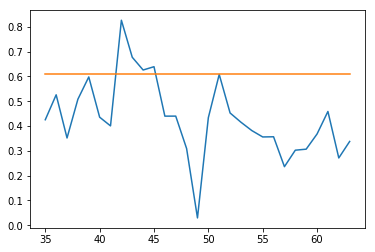

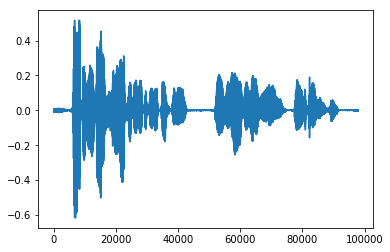

In [83]:

plt.plot(res_set['y_pred_r'])
plt.plot(res_set['y_value'])
plt.figure()
plt.plot(sig)

In [76]:
audio_path = '../test'

In [30]:
ref_path = '/nas/home/cborrelli/speech_forensics/dataset/test-clean_industrial_7/7729/102255/7729-102255-0003.wav'

In [39]:
import time
paths = res_df['path']
maj_y_cl_true = []
maj_y_cl_pred = []

maj_y_mcl_true = []
maj_y_mcl_pred = []
for a in paths:
    start = time.time()
    subset = res_df[res_df['path'] == a]
    maj_y_cl_true.append(subset['y_binlabel'].unique()[0])
    
    #count = Counter(subset['y_pred_cl'])
    #maj_y_cl_pred.append(count.most_common()[0][0])
    count = np.bincount(subset['y_pred_cl'])
    maj_y_cl_pred.append(bool(np.argmax(count)))
    
    maj_y_mcl_true.append(subset['y_label'].unique()[0])
    
    #count = Counter(subset['y_pred_mcl'])
    #maj_y_mcl_pred.append(count.most_common()[0][0])
    count = np.bincount(subset['y_pred_mcl'])
    maj_y_mcl_pred.append(np.argmax(count))


    print(time.time() -start)
    break

0.011067390441894531


In [89]:
results = pd.read_pickle('../results_windowing/metrics.pkl')

In [90]:
results

,window_length,cl_balanced_accuracy,cl_f1_score,mcl_balanced_accuracy,mcl_f1,r_R2,r_mae,maj_cl_balanced_accuracy,maj_cl_f1_score,maj_mcl_balanced_accuracy,maj_mcl_f1_score
0,10,0.720426,0.661077,0.355496,0.373410,0.229273,0.213198,0.835930,0.789827,0.453249,0.479626
1,12,0.732437,0.673992,0.370730,0.389098,0.241185,0.209575,0.842411,0.797312,0.476708,0.503624
2,14,0.743621,0.686695,0.384779,0.403840,0.267155,0.205325,0.847305,0.802950,0.485402,0.512151
3,16,0.754314,0.698659,0.397064,0.416581,0.302089,0.199822,0.853678,0.810640,0.498585,0.525711
4,18,0.765303,0.710942,0.411458,0.431745,0.344447,0.192860,0.857565,0.815390,0.503895,0.533069
5,20,0.773545,0.720336,0.424484,0.444993,0.376544,0.187705,0.858891,0.817196,0.510153,0.539270


In [88]:
results

,window_length,cl_balanced_accuracy,cl_f1_score,mcl_balanced_accuracy,mcl_f1,r_R2,r_mae,maj_cl_balanced_accuracy,maj_cl_f1_score,maj_mcl_balanced_accuracy,maj_mcl_f1_score


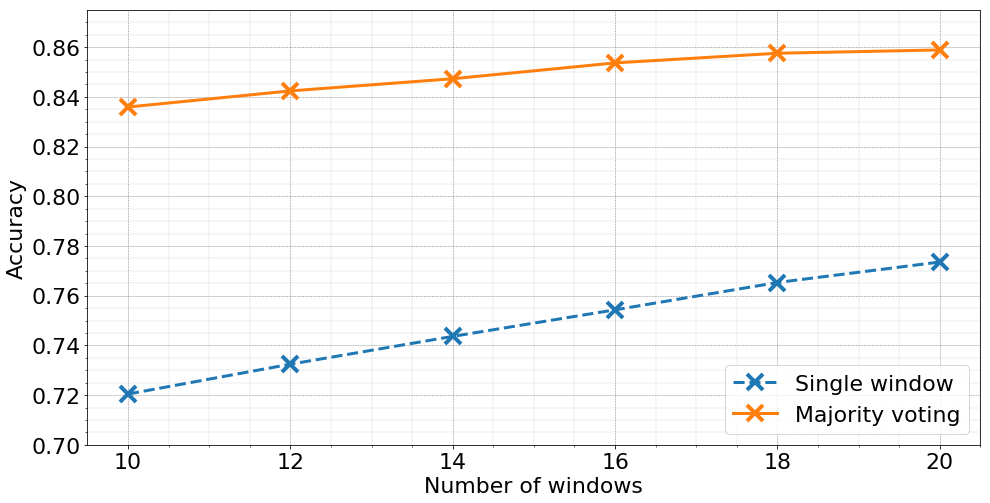

In [187]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
plt.xlabel('Number of windows',)
plt.ylabel('Accuracy')
plt.ylim(0.7,0.875)
ax.minorticks_on()

x = results['window_length']
plt.plot(x, np.asarray(results['cl_balanced_accuracy'], dtype=np.float), linestyle='dashed', linewidth=3, marker='x', markersize=16, markeredgewidth=4)
plt.plot(x, np.asarray(results['maj_cl_balanced_accuracy'], dtype=np.float),  linestyle='solid', linewidth=3, marker='x', markersize=16, markeredgewidth=4)
ax.grid(which='both')
ax.grid(which='major', linestyle='dashed', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle='dashed', linewidth='0.2', color='gray')
plt.legend(['Single window', 'Majority voting'], loc='lower right')
plt.savefig('accuracy_win.pdf', bbox_inches='tight')
plt.show()



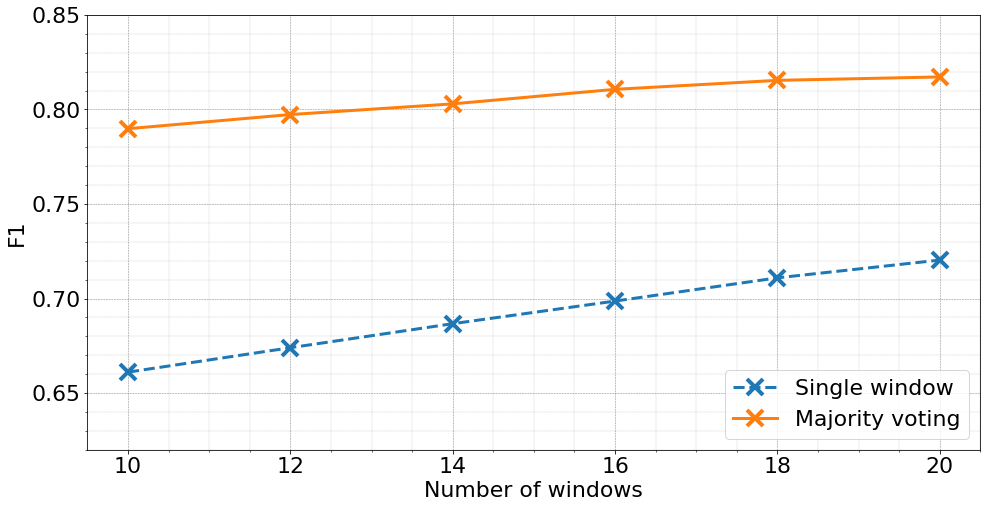

In [186]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
plt.xlabel('Number of windows',)
plt.ylabel('F1')
plt.ylim(0.62,0.85)
ax.minorticks_on()

x = results['window_length']
plt.plot(x, np.asarray(results['cl_f1_score'], dtype=np.float), linestyle='dashed', linewidth=3, marker='x', markersize=16, markeredgewidth=4)
plt.plot(x, np.asarray(results['maj_cl_f1_score'], dtype=np.float),  linestyle='solid', linewidth=3, marker='x', markersize=16, markeredgewidth=4)
ax.grid(which='both')
ax.grid(which='major', linestyle='dashed', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle='dashed', linewidth='0.2', color='gray')
plt.legend(['Single window', 'Majority voting'], loc='lower right')
plt.savefig('f1_win.pdf', bbox_inches='tight')
plt.show()

## Select some test files for plot that have nice scores on windows

In [ ]:
audio_tests = ['/nas/home/cborrelli/speech_forensics/dataset/test-clean_industrial_5/5105/28240/5105-28240-0023.wav']


for w in win_feature_length:
    res_file_name ='results_windowlenght-'+str(w)
    res_df = pd.read_pickle(os.path.join(result_folder, res_file_name))
    
    # majority voting
    maj_y_cl_true = []
    maj_y_cl_pred = []

    maj_y_mcl_true = []
    maj_y_mcl_pred = []
    for a in audio_tests:
        start = time.time()
        subset = res_df[res_df['path'] == a]
        maj_y_cl_true.append(subset['y_binlabel'].unique()[0])

        count = np.bincount(subset['y_pred_cl'])
        maj_y_cl_pred.append(bool(np.argmax(count)))

        maj_y_mcl_true.append(subset['y_label'].unique()[0])
        
        count = np.bincount(subset['y_pred_mcl'])
        maj_y_mcl_pred.append(float(np.argmax(count)))
    
    
        maj_cl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(maj_y_cl_true, maj_y_cl_pred)
        maj_cl_f1_score = sklearn.metrics.f1_score(maj_y_cl_true, maj_y_cl_pred)
    
        maj_mcl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(maj_y_mcl_true, maj_y_mcl_pred)
        maj_mcl_f1_score = sklearn.metrics.f1_score(maj_y_mcl_true, maj_y_mcl_pred, average='micro')
    
        print('File name: '+a)
        print('Binary balanced accuracy: '+ str(maj_cl_balanced_accuracy)